# Dataset Sloan Digital Sky Survey DR14
## 1.- Comprendiendo los datos:
* ra, dec : ascensión recta y declinación (sistema ecuatorial de coordendas)
* u,g,r,i,z : filtros
* run, rerun, camcol, field - descriptores de campos (2048 x 1489 píxeles aprox)
* redshift: aumento de la longitud de onda debido al movimiento del objeto astronómico por efecto doppler
* plate : número de placa
* mjd : fecha de observación 
* fiberid : fibra óptica

## 2.- Data Clean

In [10]:
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
import pydot

import warnings

warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv("./dataset.txt",sep=",")

In [12]:
data.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [13]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [14]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

* no hay perdida de datos ya que no hay datos nulos

In [15]:
p_galaxy = data["class"].value_counts()[0]/100
p_star = data["class"].value_counts()[1]/100
p_qso = data["class"].value_counts()[2]/100
print("")
print("porcentaje de galaxias : "+str(p_galaxy)+"%")
print("porcentaje de estrellas reconocidas: "+str(p_star)+"%")
print("porcentaje de quasares reconocidos: "+str(p_qso)+"%")



porcentaje de galaxias : 49.98%
porcentaje de estrellas reconocidas: 41.52%
porcentaje de quasares reconocidos: 8.5%



#### hay algunas columnas que no tienen mucha relación para detectar si son de esta clase, por tanto las quitaremos
cabe destacar que podemos normalizar algunas variables para considerarlas en el analisis, pero por concepto mejor dejamos las mas relacionadas a longitud de onda.

In [16]:
data.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [17]:
#elimino las columnas que encuentro que no son necesarias para mi analisis
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid','mjd','fiberid','plate'], axis=1, inplace=True)
data.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


# Dada la naturaleza de los datos astronómicos estan relacionados mediante filtros de radiacion infraroja, angulo de declinacion

In [18]:
#mi variable dependiente
data.head()
y=data.iloc[:,7:8]

### Convertimos las clases a 1, 2 y 3.

* STAR=1, GALAXY=2, QSO=3

In [19]:
for i in range(10000):
    if(y.values[i]==['STAR']):
        y.values[i]=['1']
    if(y.values[i]==['GALAXY']):
        y.values[i]=['2']
    if(y.values[i]==['QSO']):
        y.values[i]=['3']

In [20]:
# ya no necesito la columna class asi que la eliminamos
data.drop(['class'], axis=1, inplace=True)

In [21]:
#seleccionamos un subset de los datos que son relevantes y sera la variable de caracteristicas.
X =data.iloc[:,:] 

In [22]:
X.tail(5)

,ra,dec,u,g,r,i,z,redshift
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019
9999,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,0.118417


## Visualizaciones representativas de los datos

Exploramos la distribucion de densidad de los datos


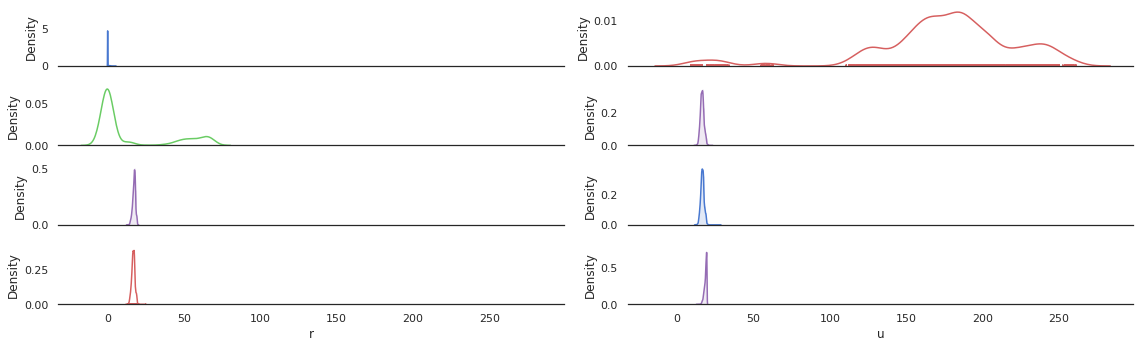

In [46]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(4,2, figsize=(16, 5), sharex=True)
sns.despine(left=True)
sns.distplot(X["redshift"],  color="b", ax=axes[0, 0])
sns.distplot(X["ra"], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(X["dec"], hist=False, color="g", ax=axes[1, 0])
sns.distplot(X["z"], color="m", ax=axes[1, 1])
sns.distplot(X["g"], color="m", ax=axes[2, 0])
sns.distplot(X["i"],  color="b", ax=axes[2, 1])
sns.distplot(X["r"], hist=False, rug=True, color="r", ax=axes[3, 0])
sns.distplot(X["u"], color="m", ax=axes[3, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()                       
print("Exploramos la distribucion de densidad de los datos")

Text(0, 0.5, 'filtro Z')

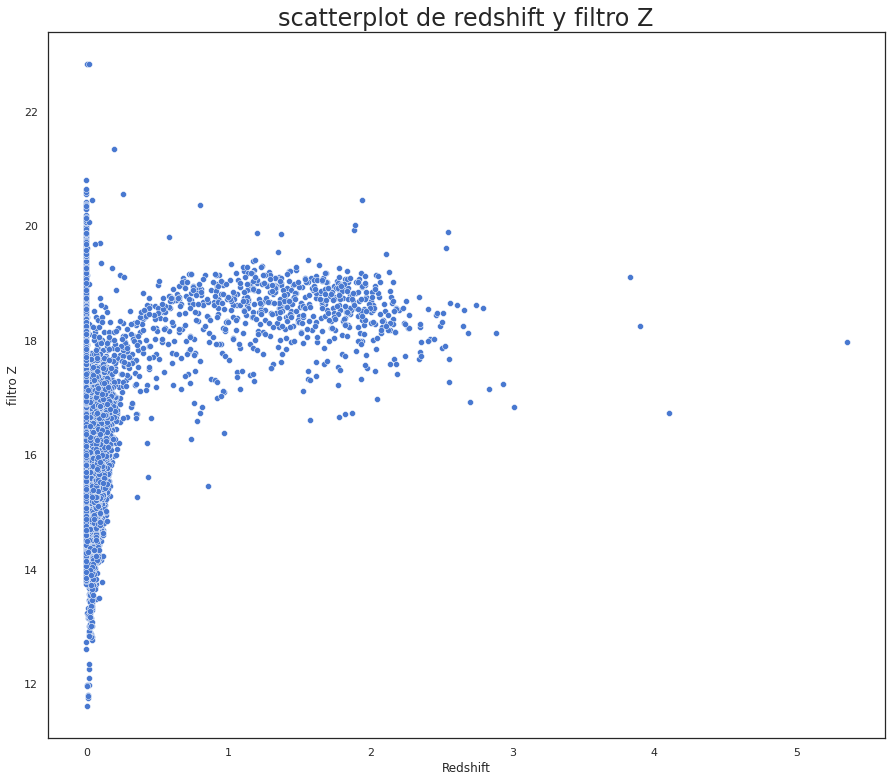

In [47]:
fig, ax = plt.subplots(figsize = ( 15 , 13 )) 
sns.scatterplot(ax=ax, x="redshift", y="z", data=X);
ax.set_title("scatterplot de redshift y filtro Z",size=24)
ax.set_xlabel("Redshift")
ax.set_ylabel("filtro Z")

Text(0, 0.5, 'dec, declinacion angular de la recta ')

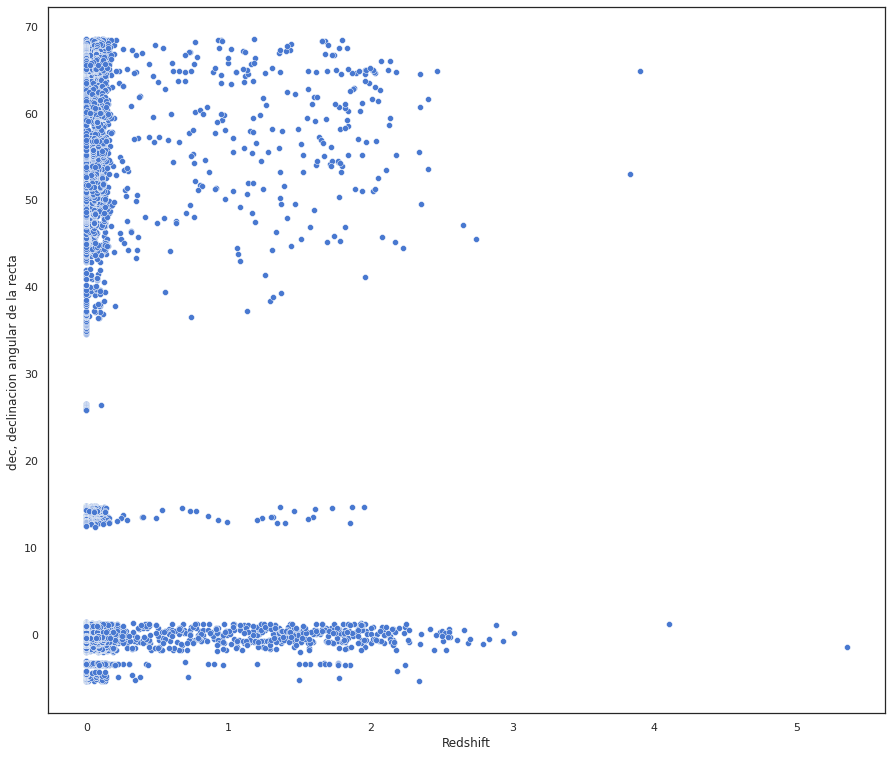

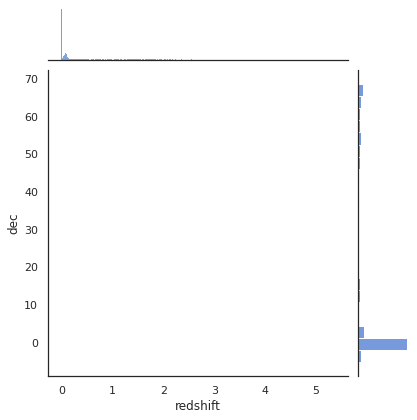

In [52]:
fig1, ax1 = plt.subplots(figsize = ( 15 , 13 )) 
sns.jointplot(ax=ax1,x="redshift", y="dec", data=X);
ax1.set_xlabel("Redshift")
ax1.set_ylabel("dec, declinacion angular de la recta ")
#candidato a arbol

Text(336.9714285714286, 0.5, 'distancia respecto que miramos el astro')

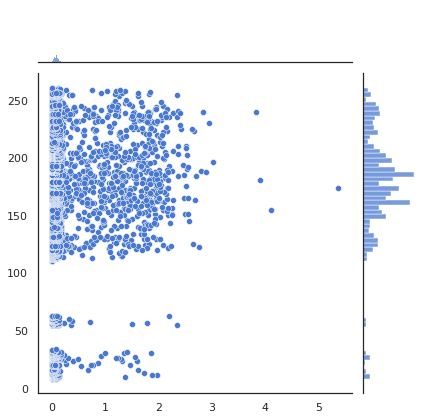

In [53]:
sns.jointplot(X["redshift"].values, X["ra"].values, data=X);
plt.xlabel("Redshift")
plt.ylabel("distancia respecto que miramos el astro")

In [54]:
X.mean()

ra          175.529987
dec          14.836148
u            18.619355
g            17.371931
r            16.840963
i            16.583579
z            16.422833
redshift      0.143726
dtype: float64

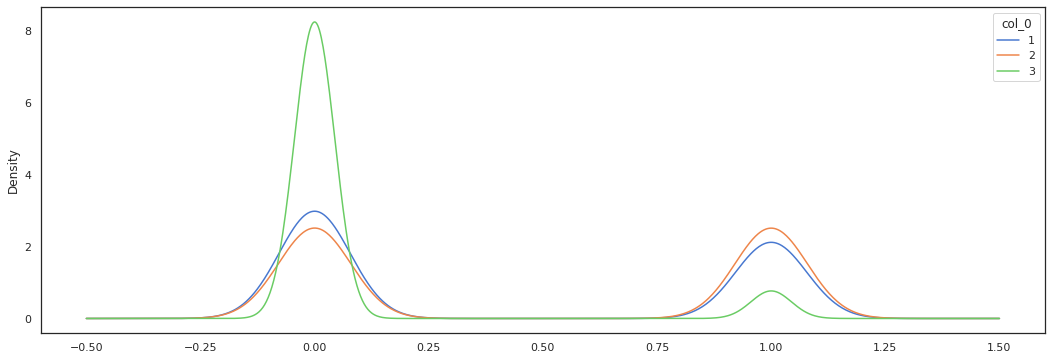

Text(0.5, 0, 'Ascension Recta')

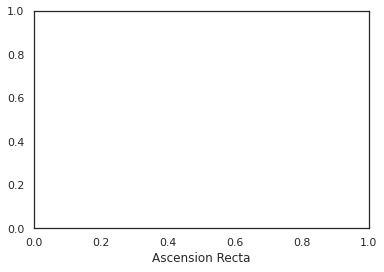

In [55]:
pd.crosstab(X["ra"].values,y["class"].values).plot(kind="density",figsize=(18,6))
plt.show()
plt.xlabel("Ascension Recta")

### Las clases 1 y 2 se parecen en su distribucion, en cambio la clase 3 difiere mucho su media. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Esto muestra las coordenadas Ecuatoriales


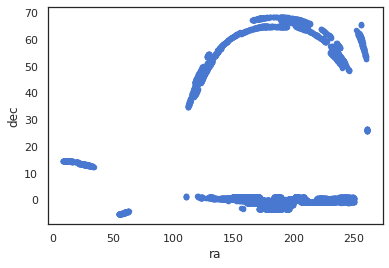

In [56]:
data.plot(kind="scatter", x="ra", y = "dec")
print("Esto muestra las coordenadas Ecuatoriales")

Text(0.5, 1.0, 'histograma de filtro Redshift ')

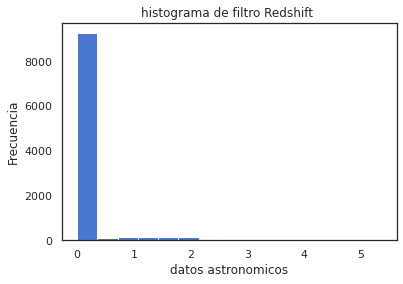

In [57]:
c = 1+ np.log2(10000)
plt.hist(X["redshift"], bins=int(np.ceil(c))) #bins  = [0,30,60,...]
plt.xlabel("datos astronomicos")
plt.ylabel("Frecuencia")
plt.title("histograma de filtro Redshift ")

## Entrenamos el modelo 
### 3 metodos distintos los que mejor se consideren
* Random Forest
* SVM 
* regresion logistica multi class

In [58]:
# Entrenamos el modelo.
X_train, X_test, y_train,y_test = train_test_split(X,y["class"],test_size=0.2)

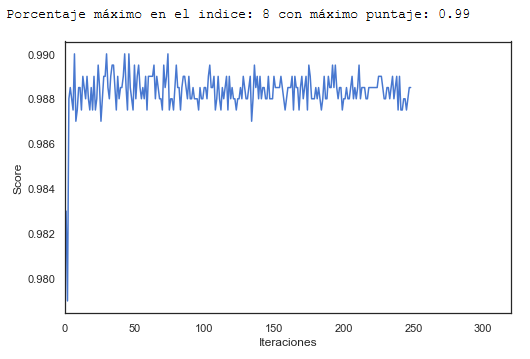

In [59]:
Image("n_estimador.png")

In [60]:
#utilizamos random forest con n_estimators=8
model = RandomForestClassifier(n_estimators=8)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9885

In [ ]:
#estimador ideal
'''z = 250
c_optimo=[]
for i in range(1,z):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    c_optimo.append(model.score(X_test,y_test))
'''

In [ ]:
'''%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,250)
plt.plot(c_optimo)
plt.xlabel("Iteraciones")
plt.ylabel("Score")
print("Porcentaje máximo en el indice: "+str(c_optimo.index(max(c_optimo))+1)+" con máximo puntaje: "+str(max(c_optimo)))
'''

In [61]:
print("Reporte de rendimiento del modelo random forest: \n")
y_predicted = model.predict(X_test)
cm =confusion_matrix(y_test,y_predicted)
print(cm)
print(classification_report(y_test,y_predicted))

Reporte de rendimiento del modelo random forest: 

[[ 802    1    0]
 [   1 1033    9]
 [   0   12  142]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       803
           2       0.99      0.99      0.99      1043
           3       0.94      0.92      0.93       154

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
'''%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('y predecida')
plt.ylabel("Verdadero")
'''

In [ ]:

features =['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']
# un extracto del arbol del modelo construido
tree_small = model.estimators_[3]
# guardamos el arbol en un png
export_graphviz(tree_small, out_file = 'small_tree.dot', 
                feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

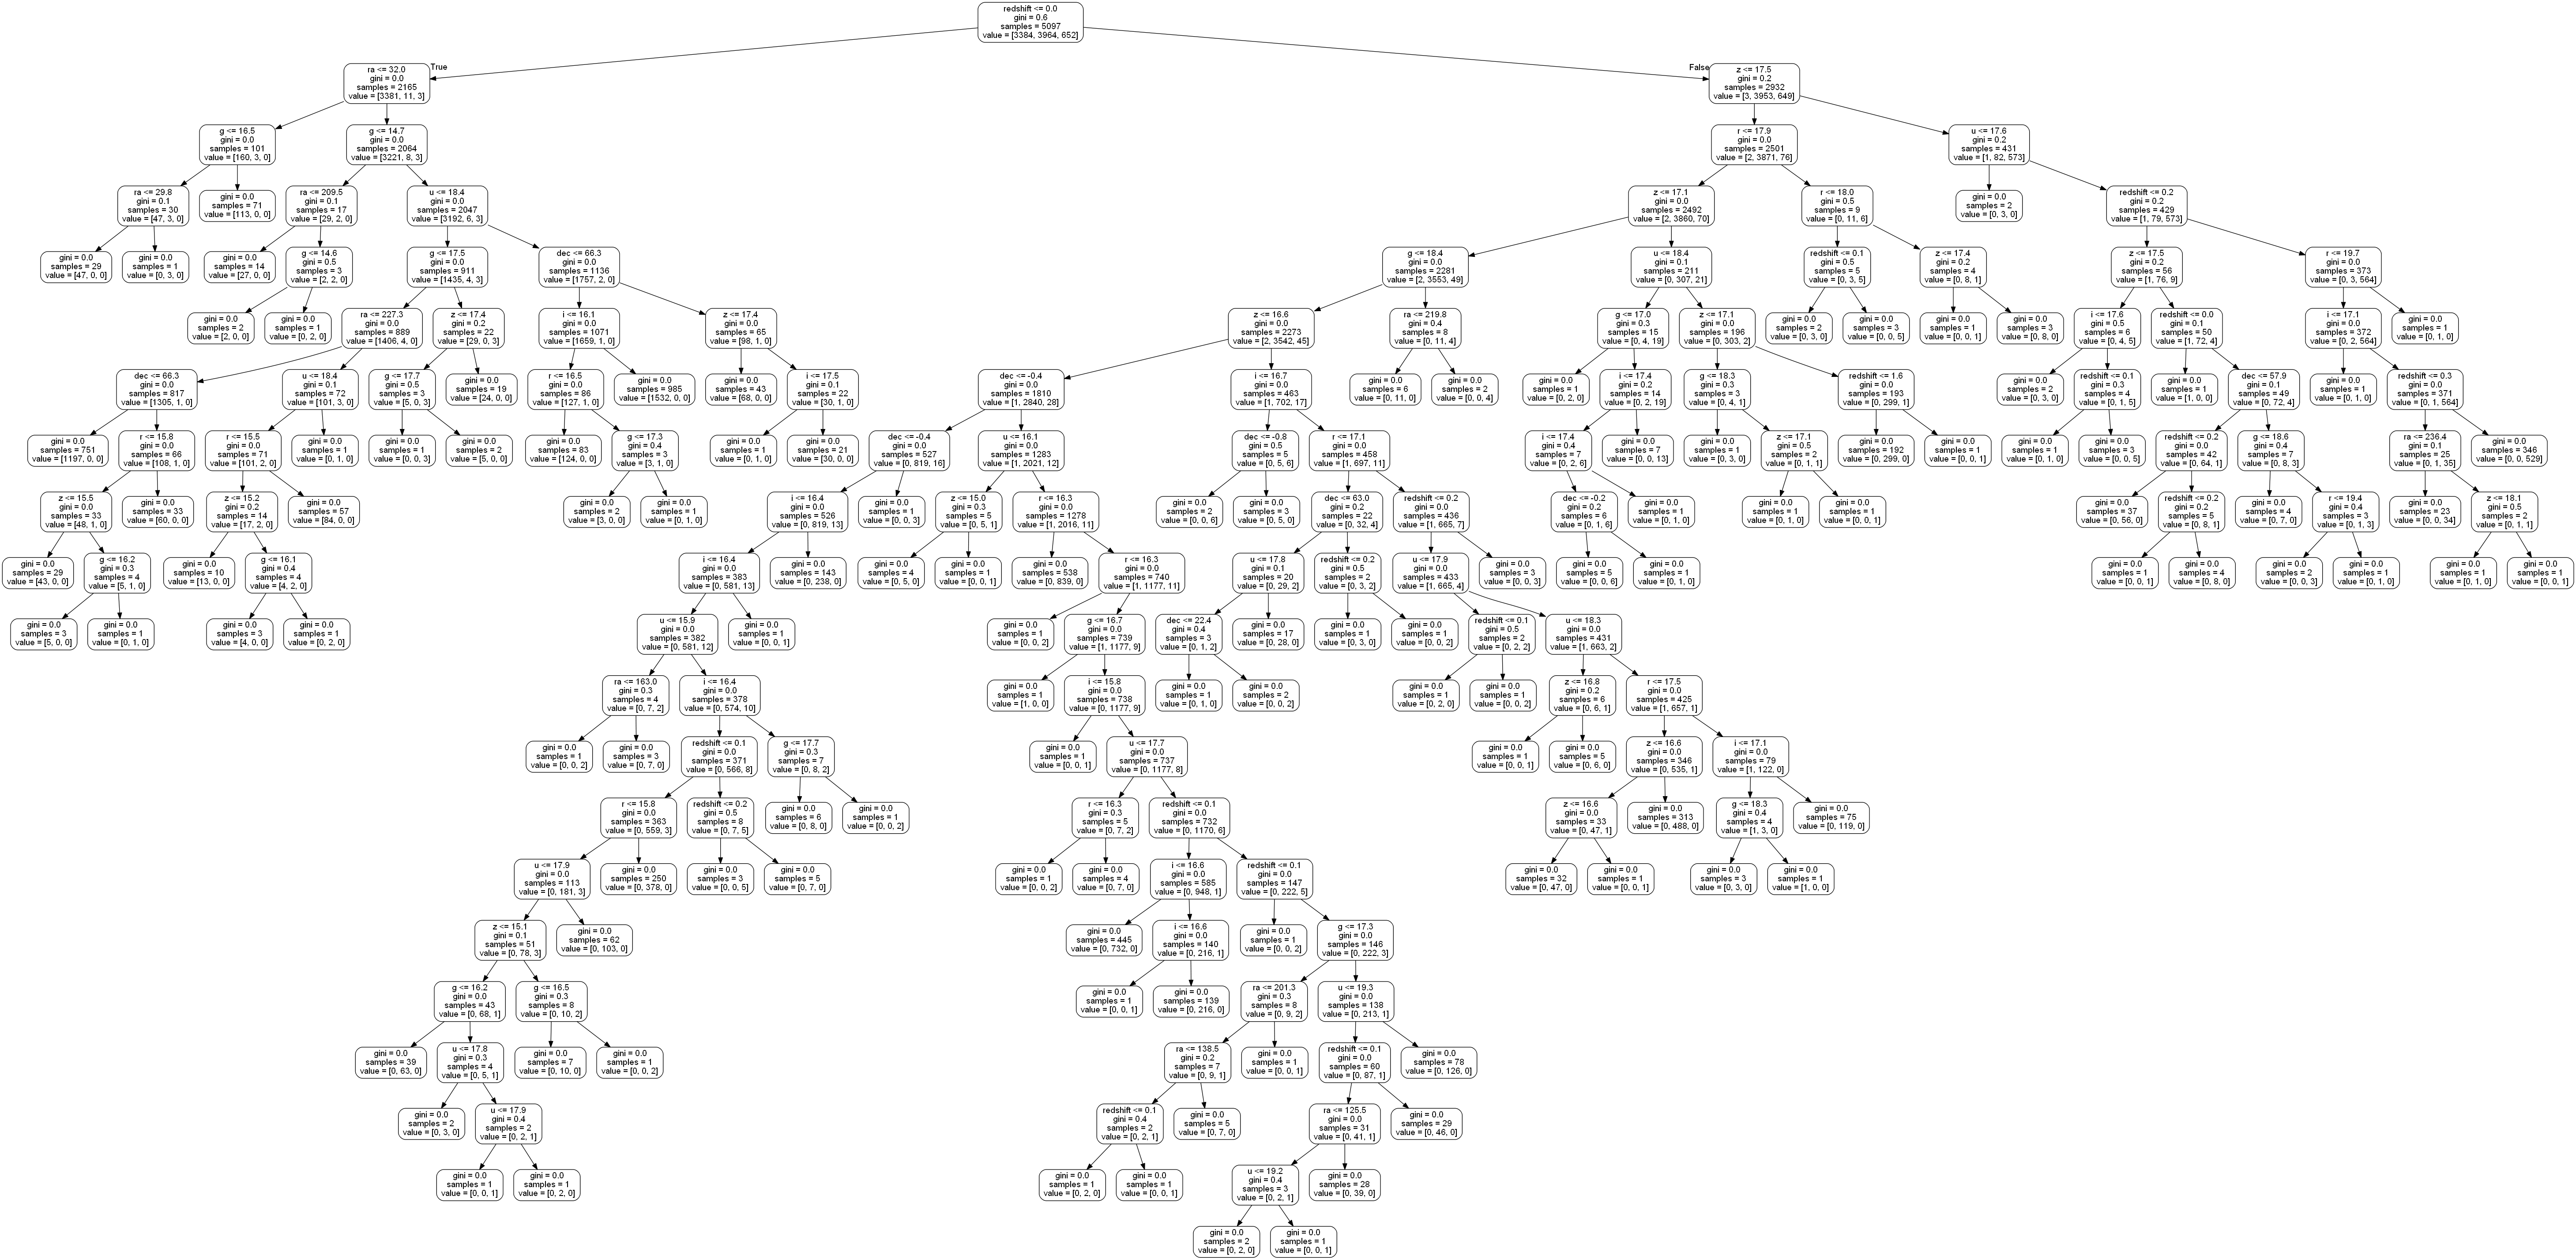

In [67]:
Image("small_tree.png")

## Entrenamos un modelo con SVM 

In [ ]:
#Encontremos un C optimo y graficamos como se comporta al cambiar los estimadores
'''
yn=3
xn = X.shape[1]
z = yn*xn*10
c_optimo=[]
from sklearn.svm import SVC
for i in range(1,z):
    svmodel = SVC(C=i,gamma ='auto')
    svmodel.fit(X_train,y_train)
    c_optimo.append(svmodel.score(X_test,y_test))
'''


In [ ]:
'''
%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,320)
plt.plot(c_optimo)
plt.xlabel("iteraciones")
plt.ylabel("Score")
print("porcentaje maximo en el indice: "+str(c_optimo.index(max(c_optimo)))+" con maximo puntaje: "+str(max(c_optimo)))
'''

con C=62 nos da un buen Score


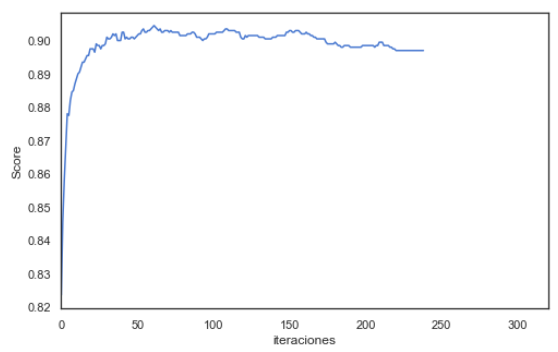

In [68]:
print("con C=62 nos da un buen Score")
Image("score_svc.png")

### Despues de la busqueda del mejor C, tenemos que C=62 es un buen Score.

In [75]:
svmodel = SVC(C=62,gamma ='auto')
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

0.907

In [76]:
y_predicted = svmodel.predict(X_test)

In [77]:
# vemos el rendimiento con la matriz de confusion
svc_cm =confusion_matrix(y_test,y_predicted)
print(svc_cm)
print(classification_report(y_test,y_predicted))

[[739  62   2]
 [ 85 949   9]
 [ 11  17 126]]
              precision    recall  f1-score   support

           1       0.89      0.92      0.90       803
           2       0.92      0.91      0.92      1043
           3       0.92      0.82      0.87       154

    accuracy                           0.91      2000
   macro avg       0.91      0.88      0.89      2000
weighted avg       0.91      0.91      0.91      2000



# Ahora Entrenamos los datos con un modelo de Regresion Logistica.
*

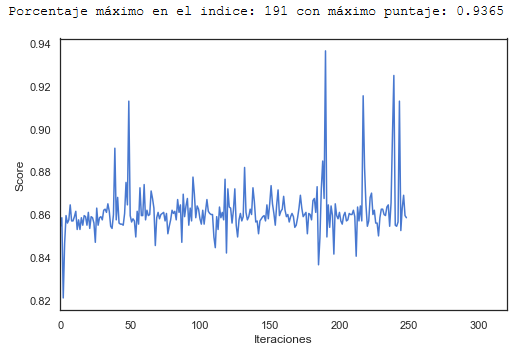

In [78]:
Image("score_rl.png")

In [ ]:
'''z = 250
c_optimo=[]
for i in range(1,z):
    rl = LogisticRegression(C=i)
    rl.fit(X_train,y_train)
    c_optimo.append(rl.score(X_test,y_test))
'''

In [ ]:
'''%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,320)
plt.plot(c_optimo)
plt.xlabel("Iteraciones")
plt.ylabel("Score")
print("Porcentaje máximo en el indice: "+str(c_optimo.index(max(c_optimo))+1)+" con máximo puntaje: "+str(max(c_optimo)))
'''

## Utiizamos el C=191 factible.

In [79]:
rl = LogisticRegression(C=191)
rl.fit(X_train,y_train)
rl.score(X_test,y_test)

0.85

In [80]:
y_predicted = rl.predict(X_test)
# vemos el rendimiento con la matriz de confusion
rl_cm =confusion_matrix(y_test,y_predicted)
print(rl_cm)
print(classification_report(y_test,y_predicted))

[[689  99  15]
 [158 885   0]
 [  6  22 126]]
              precision    recall  f1-score   support

           1       0.81      0.86      0.83       803
           2       0.88      0.85      0.86      1043
           3       0.89      0.82      0.85       154

    accuracy                           0.85      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.85      0.85      0.85      2000



##  Conclusion

Se puede concluir que nuestro mejor modelo ha sido el de random forest ya que predice de manera mucho mas exacta 
que los otros modelos como SVM y Regresion logistica. Esto se debe por la naturaleza de los datos, nos conviene un bosque de arboles toman un mayor control sobre las decisiones.

Se podria seguir refinando los modelos, como por ejemplo aplicar cross-validation al conjunto de datos de entrenamiento 
para lograr un modelo mas robusto.
Podriamos eliminar algunos datos atipicos que no nos ayuden mucho.
Tambien podriamos haber aplicado para la regresion logistica la funcion Softmax en funcion de la cantidad de clases que en este caso fueron 3 y puede que haya sido mejor que el tradicional. que nos dio el puntaje mas bajo.